# scipy

scipy 一般都是操控Numpy数组来进行科学计算。

根据已有的数值行为，预测未知的数据，就是回归问题

y的真实值=f(x)+e，e就是残值，也叫做误差

最小二乘法的原则是以“残值平方和最小”确定直线位置

scipy 的统计模块、优化模块，插值模块是会用到比较多的

$E=mc^2$
jupyter 自动补全
https://blog.csdn.net/wyxxxx_/article/details/107388018

配置中文显示

https://blog.csdn.net/qq_42506411/article/details/107414955

## 画图思路
1. 创建画布 plt.figure()
2. 是否创建子图 figure.add_subplot()
3. 绘制图形plt.plot()  用其他包画图，**改的就只有这个部分**
4. 添加画布的内容：标签标题，
5. 保存或者输出

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 中文的正常显示
plt.rcParams['font.sans-serif']='SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus']=False # 设置显示负号

画一个y = sin(x)函数

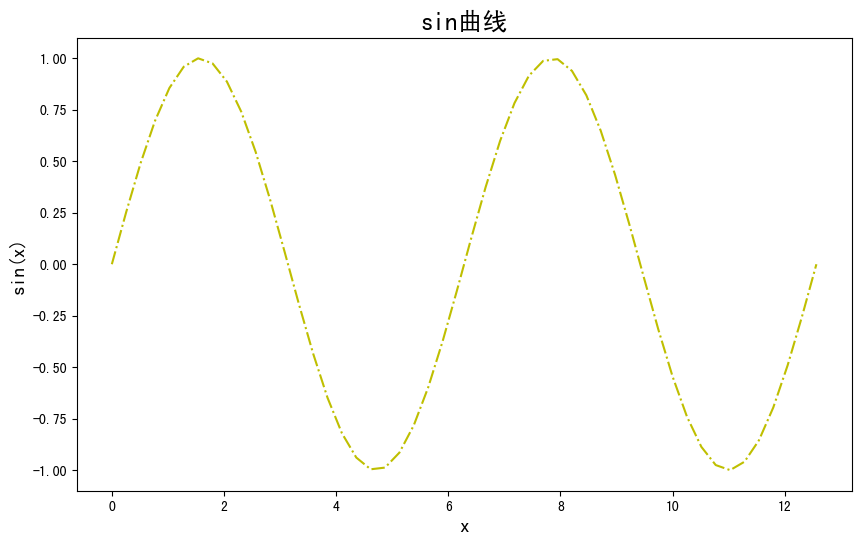

In [3]:
# 创建一个画布
plt.figure(figsize=(10,6),dpi=100) # 画布大小和像素
data=np.linspace(0,4*np.pi,50) # x轴数据，开始值，结束值，num数量
y = np.sin(data) #y轴数据
# 绘制图形
plt.plot(data,y,color='y',linestyle='-.') # linestyle默认为‘-’
# 添加标签
plt.xlabel('x',fontsize=14)
plt.ylabel('sin(x)',fontsize=14)
# 设置标题
plt.title('sin曲线',fontsize=18)
# 保存和显示图形
plt.savefig('img/sin曲线.jpg')
plt.show()

# 国民经济核算季度数据分析与可视化

In [4]:
# 导入数据
data = np.load('data/国民经济核算季度数据.npz',allow_pickle=True) 
# 允许使用 Python pickles 保存对象数组，Python 中的 pickle 用于在保存到磁盘文件或从磁盘文件读取之前，对对象进行序列化和反序列化。
print(data.files) # files 查看各数组的名称['columns', 'values']
# 提取 各数组
colums, values = data['columns'],data['values'] # 结构是两个数组，一个是表头，一个是值。
print(colums)# 一维数组
print(values)# 二维数组

['columns', 'values']
['序号' '时间' '国内生产总值_当季值(亿元)' '第一产业增加值_当季值(亿元)' '第二产业增加值_当季值(亿元)'
 '第三产业增加值_当季值(亿元)' '农林牧渔业增加值_当季值(亿元)' '工业增加值_当季值(亿元)' '建筑业增加值_当季值(亿元)'
 '批发和零售业增加值_当季值(亿元)' '交通运输、仓储和邮政业增加值_当季值(亿元)' '住宿和餐饮业增加值_当季值(亿元)'
 '金融业增加值_当季值(亿元)' '房地产业增加值_当季值(亿元)' '其他行业增加值_当季值(亿元)']
[[1 '2000年第一季度' 21329.9 ... 1235.9 933.7 3586.1]
 [2 '2000年第二季度' 24043.4 ... 1124.0 904.7 3464.9]
 [3 '2000年第三季度' 25712.5 ... 1170.4 1070.9 3518.2]
 ...
 [67 '2016年第三季度' 190529.5 ... 15472.5 12164.1 37964.1]
 [68 '2016年第四季度' 211281.3 ... 15548.7 13214.9 39848.4]
 [69 '2017年第一季度' 180682.7 ... 17213.5 12393.4 42443.1]]


## 散点图的绘制

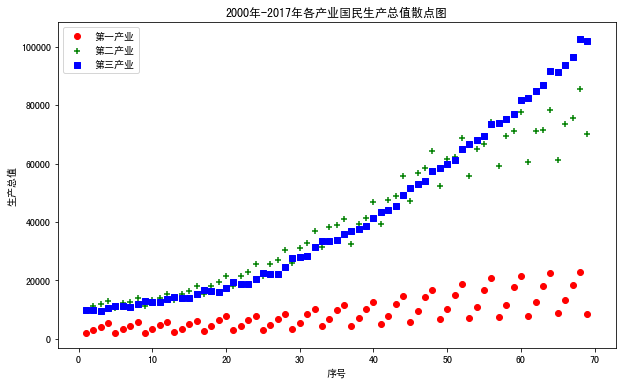

In [5]:
# 绘制2000年-2017年各产业国民生产总值的散点图
# 创建画布
plt.figure(figsize=(10,6)) # dpi像素默认为72
# 绘制第一、二三产业的散点图
plt.scatter(values[:,0],values[:,3],marker='o',c='r') # x,y values[:,3]二维数组的取值，行全要，要索引为3列
plt.scatter(values[:,0],values[:,4],marker='+',c='g') 
plt.scatter(values[:,0],values[:,5],marker='s',c='b') # s 为正方形
# 添加标签，标题
plt.xlabel('序号')
plt.ylabel('生产总值')
plt.title('2000年-2017年各产业国民生产总值散点图')
# plt.xticks([0,20,40,70]) # 可以通过这个去改x轴的刻度
# 添加图例
plt.legend(['第一产业','第二产业','第三产业'])
plt.show()

## 折线图的绘制

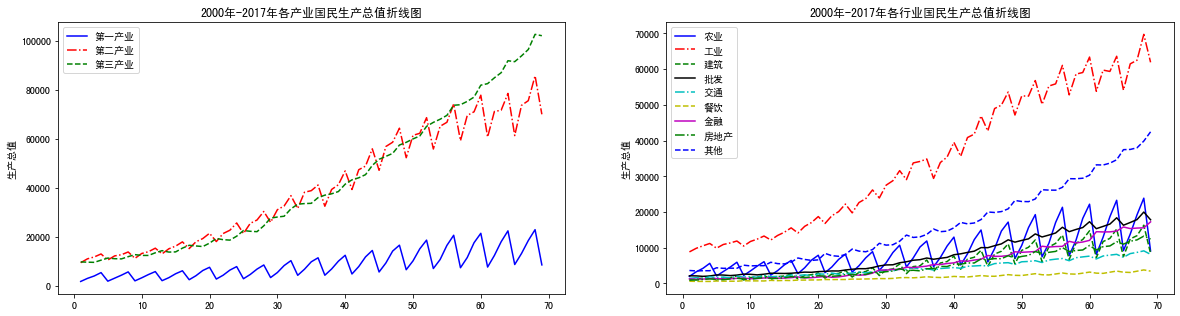

In [6]:
# 配置label
label1=['第一产业','第二产业','第三产业']
label2=['农业','工业','建筑','批发','交通','餐饮','金融','房地产','其他']
# 创建画布
fig2 = plt.figure(figsize=(20,5))
# 创建子图1
fig2.add_subplot(1,2,1) # 几行，几列，索引位置（从左上角为1开始向右增加）
# 绘制三大产业折线图
plt.plot(values[:,0],values[:,3],'b-', 
         values[:,0],values[:,4],'r-.',
         values[:,0],values[:,5],'g--',)# 实线、点划线、虚线
plt.ylabel('生产总值')
plt.title('2000年-2017年各产业国民生产总值折线图')
plt.legend(label1)
# 创建子图2
fig2.add_subplot(1,2,2)
plt.plot(values[:,0],values[:,6],'b-', 
         values[:,0],values[:,7],'r-.',
         values[:,0],values[:,8],'g--',
         values[:,0],values[:,9],'k-', 
         values[:,0],values[:,10],'c-.',
         values[:,0],values[:,11],'y--',
         values[:,0],values[:,12],'m-', 
         values[:,0],values[:,13],'g-.',
         values[:,0],values[:,14],'b--',)
plt.ylabel('生产总值')
plt.title('2000年-2017年各行业国民生产总值折线图')
plt.legend(label2)
plt.show()


## 柱状图绘制


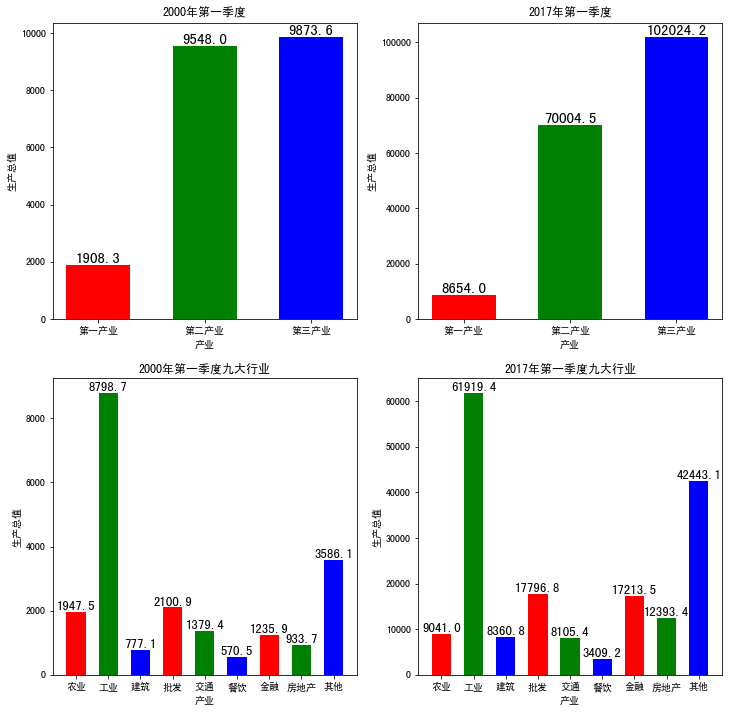

In [23]:
# 配置label
label1=['第一产业','第二产业','第三产业']
label2=['农业','工业','建筑','批发','交通','餐饮','金融','房地产','其他']
# 创建画布
fig3 = plt.figure(figsize=(12,12))
# 创建子图1
fig3.add_subplot(2,2,1) 
plt.bar(range(3),values[0,3:6],width=0.6,color=['r','g','b'])# 2000年的数据
plt.xlabel('产业')
plt.ylabel('生产总值')
plt.title('2000年第一季度')
# 设置刻度
plt.xticks(ticks=range(3),labels=label1) # 设置刻度，数目（在012的位置画竖杠,要和之前的range（3）对应），取值
# 添加文本
for a,b in zip(range(3),values[0,3:6]):
    plt.text(a,b,'%.1f'%b,va='bottom',ha='center',fontsize=15) # x，y文本在坐标轴中的坐标位置，第三个是值（保留一位小数）,垂直对齐，水瓶对齐。

# 创建子图2
fig3.add_subplot(2,2,2)
plt.bar(range(3),values[-1,3:6],width=0.6,color=['r','g','b'])# 2000年的数据
plt.xlabel('产业')
plt.ylabel('生产总值')
plt.title('2017年第一季度')
plt.xticks(ticks=range(3),labels=label1)

for a,b in zip(range(3),values[-1,3:6]):
    plt.text(a,b,'%.1f'%b,va='bottom',ha='center',fontsize=15)

# 创建子图3
fig3.add_subplot(2,2,3)
plt.bar(range(9),values[0,6:],width=0.6,color=['r','g','b'])# 2000年的数据
plt.xlabel('产业')
plt.ylabel('生产总值')
plt.title('2000年第一季度九大行业')
plt.xticks(ticks=range(9),labels=label2)

for a,b in zip(range(9),values[0,6:]):
    plt.text(a,b,'%.1f'%b,va='bottom',ha='center',fontsize=13)

# 创建子图4
fig3.add_subplot(2,2,4)
plt.bar(range(9),values[-1,6:],width=0.6,color=['r','g','b'])# 2000年的数据
plt.xlabel('产业')
plt.ylabel('生产总值')
plt.title('2017年第一季度九大行业')
plt.xticks(ticks=range(9),labels=label2)

for a,b in zip(range(9),values[-1,6:]):
    plt.text(a,b,'%.1f'%b,va='bottom',ha='center',fontsize=13)


plt.show()

## 饼图绘制

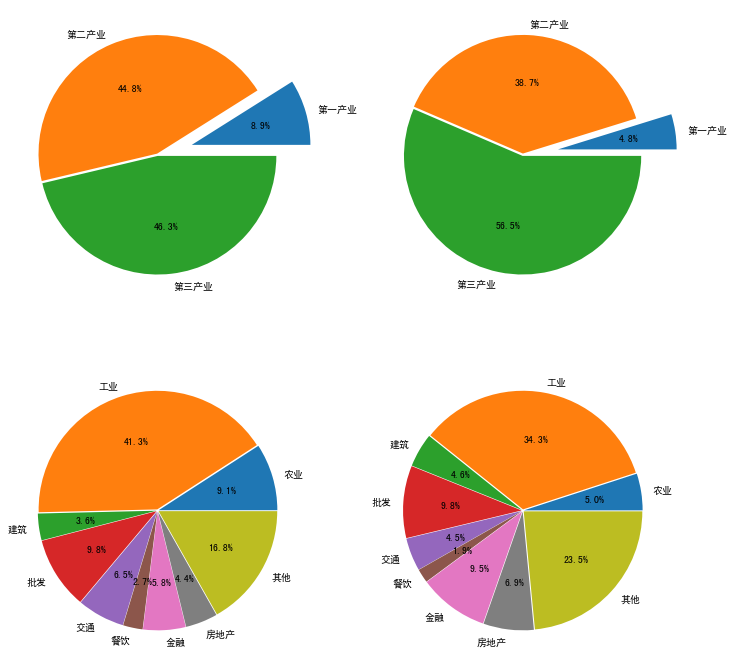

In [32]:
# 设置explode
explode1=[0.3,0.01,0.01] # 进行突出显示
explode2=np.ones(9)*0.01 # 进行快速生成一维数组
fig4=plt.figure(figsize=(12,12))
# 子图1
fig4.add_subplot(2,2,1)
plt.pie(values[0,3:6],labels=label1,autopct='%2.1f%%',explode=explode1)# autopct 表示显示方式

# 子图2
fig4.add_subplot(2,2,2)
plt.pie(values[-1,3:6],labels=label1,autopct='%2.1f%%',explode=explode1)

# 子图3
fig4.add_subplot(2,2,3)
plt.pie(values[0,6:],labels=label2,autopct='%2.1f%%',explode=explode2)

# 子图4
fig4.add_subplot(2,2,4)
plt.pie(values[-1,6:],labels=label2,autopct='%2.1f%%',explode=explode2)

plt.show()